# Создание данных измерений с шумом.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', size=16)

Имеется ряд последовательных измерений функции $p(t)$. Требуется максимально точно вычислить $p'(t)$.
В качестве примера рассмотрим
$$
p(t) = \frac{p_0}{1 + \frac{t}{t_0}}.
$$
Добавим к измерениям шум.

In [2]:
t = np.linspace(0, 1000, 1001)
p0 = 200
t0 = 1000

# Смоделируем измерения с погрешностью
p = p0 / (1 + t / t0) + 0.1 * np.random.randn(len(t))

# Истинное значение производной - для сравнения
pprime = -p0 / t0 / (1 + t / t0)**2; 

Text(0, 0.5, 'p')

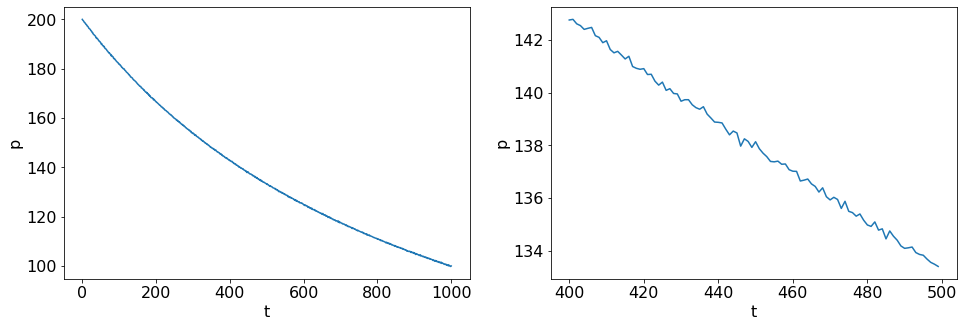

In [3]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t, p)
plt.xlabel('t'); plt.ylabel('p')
plt.subplot(1, 2, 2)
plt.plot(t[400:500], p[400:500])
plt.xlabel('t'); plt.ylabel('p')

# Конечные разности

Простейший способ численно продифференцировать табличную функцию &mdash; вычислить конечную разность.
Рассмотрим две стандартные формулы для вычисления 
$$
p'(t_i) \approx \frac{p(t_{i+1}) - p(t_i)}{t_{i+1} - t_i}\\
p'(t_i) \approx \frac{p(t_{i+1}) - p(t_{i-1})}{t_{i+1} - t_{i-1}}
$$

Отметим, что формулы дифференцирования позволяют найти производную не в каждой точке $t_i$ (кроме некоторых крайних точек). Для дифференцирования в этих точках нужно использовать другие формулы. Сейчас мы не будем на это обращать внимание, просто будем считать производную там, где получится.

In [4]:
def diff1(t, p):
    # Функция np.diff возвращает массив соседних разностей - как раз то, что нужно
    return np.diff(p) / np.diff(t)

def diff2(t, p):
    # Разность через одну точку удобнее считать с помощью операций с частями массива 
    return (p[2:] - p[:-2]) / (t[2:] - t[:-2])

def left_difference (X,Y,x):
  point_index = X.index(x)
  step =X[point_index] - X[point_index - 1]
  first_derivative = (Y[point_index] - Y[point_index - 1])/ step
  second_derivative = (Y[point_index] - 2*Y[point_index - 1] + Y[point_index - 2])/( step ** 2)
  return (first_derivative, second_derivative)

def right_difference (X,Y,x):
  point_index = X.index(x)
  step = X[point_index + 1] - X[point_index]
  first_derivative = (Y[point_index + 1] - Y[point_index])/ step
  second_derivative = (Y[point_index + 2] - 2*Y[point_index + 1] + Y[point_index])/( step ** 2)
  return (first_derivative, second_derivative)

def central_difference (X,Y,x):
  point_index = X.index(x)
  step = X[point_index + 1] - X[point_index]
  first_derivative = (Y[point_index + 1] - Y[point_index - 1])/ (2*step)
  second_derivative = (Y[point_index + 2] - 2*Y[point_index] + Y[point_index - 2])/(4* (step ** 2))
  return (first_derivative, second_derivative)


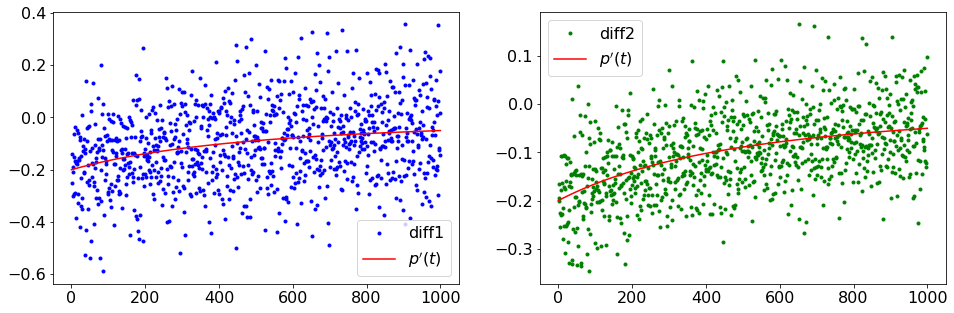

In [5]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t[1:], diff1(t, p), 'b.', label="diff1")
plt.plot(t, pprime, 'r-', label="$p'(t)$")
plt.legend(loc='best')
plt.subplot(1, 2, 2)
plt.plot(t[1:-1], diff2(t, p), 'g.', label="diff2")
plt.plot(t, pprime, 'r-', label="$p'(t)$")
plt.legend(loc='best')

Видно, что формула второго порядка дает результаты, которые ближе к точному значению. Объясняется ли это тем, что вторая формула имеет второй порядок аппроксимации, а вторая &mdash; лишь первый?

Вспомним, что при численном дифференцировании имеется два источника ошибок &mdash; первая связана с приближенным характером конечной разности (ошибка метода или ошибка аппроксимации), а вторая &mdash; с погрешностью в значениях $p(t_i)$ (ошибка вычислений).

Пусть $\tau = t_{i+1} - t_i$, а $M_k$ &mdash; максимум $k$-й производной функции $p(t)$.

|  Формула для $p'(t_i)$ | Ошибка аппроксимации  | Ошибка вычислений  |
|---|---|---|
| $\frac{p_{i+1} - p_i}{\tau}$  | $\frac{M_2 \tau}{2}$  | $ \frac{2\Delta p}{\tau} $ |
| $\frac{p_{i+1} - p_{i-1}}{2\tau}$  | $\frac{M_3 \tau^2}{6}$  | $\frac{2\Delta p}{2\tau} = \frac{\Delta p}{\tau}$  |

Подставим конкретные значения: $\tau = 1, \Delta p \approx 0.3$ (3 стандартных отклонения). В качестве оценок для максимума возьмем
$$
M_k = \frac{p_0 k!}{t_0^k}
$$
Это значение можно получить из разложения
$$
\frac{p_0}{1 - t/t_0} = 
\sum_{k=0}^\infty (-1)^k \frac{p_0 k!}{t_0^k} \frac{t^k}{k!}
$$

Подставляя эти значения, получаем

|  Формула для $p'(t_i)$ | Ошибка аппроксимации  | Ошибка вычислений  |
|---|---|---|
| $\frac{p_{i+1} - p_i}{\tau}$  | $2\cdot 10^{-4}$  | $0.6$ |
| $\frac{p_{i+1} - p_{i-1}}{2\tau}$  | $2\cdot 10^{-7}$  | $0.3$  |

В данном случае погрешность, связанная с неточным заданием $p(t_i)$, на много порядков превосходит погрешность метода. Как же уменьшить эту ошибку? Достаточно взять две более удаленные точки, например
$$
p'(x_i) \approx \frac{p(t_{i+10}) - p(t_{i-10})}{t_{i+10} - t_{i-10}}
$$

|  Формула для $p'(t_i)$ | Ошибка аппроксимации  | Ошибка вычислений  |
|---|---|---|
| $\frac{p_{i+10} - p_{i-10}}{20\tau}$  | $\frac{M_3 (10\tau)^2}{6} \approx 2 \cdot 10^{-5}$  | $\frac{2\Delta p}{20\tau} = \frac{\Delta p}{10\tau} \approx 0.03$  |

In [6]:
def diff20(t, p):
    return (p[20:] - p[:-20]) / (t[20:] - t[:-20])

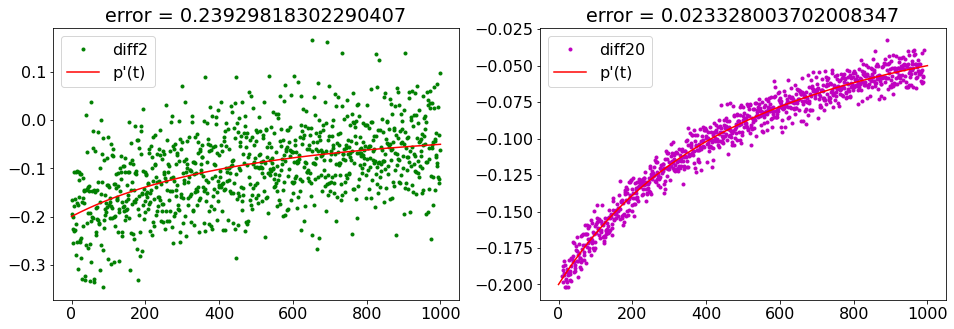

In [7]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t[1:-1], diff2(t, p), 'g.', label="diff2")
plt.plot(t, pprime, 'r-', label="p'(t)")
plt.title('error = ' + str(np.abs(diff2(t, p) - pprime[1:-1]).max()))
plt.legend(loc='best')
plt.subplot(1, 2, 2)
plt.plot(t[10:-10], diff20(t, p), 'm.', label="diff20")
plt.plot(t, pprime, 'r-', label="p'(t)")
plt.title('error = ' + str(np.abs(diff20(t, p) - pprime[10:-10]).max()))
plt.legend(loc='best')

Видно, что расстояние в 20 точек сработало гораздо лучше расстояния в 2 точки. Но оптимально ли это число?

## Задание 1.



Теоретически найти оптимальное расстояние (имеющее минимальную оценку для суммарной ошибки) между точками, используемыми для вычисления производной. Сравнить фактическую ошибку с теоретической оценкой.

$f(x_0 + h) = f(x_0) + f'(x_0)h + \frac{f''(x_0)}{2!}h^2 + \frac{f'''(x_0)}{3!}h^3 + o(h^3)$

$\left| f'(x_0) - \frac{f(x_0 + h) - f(x_0-h)}{2h} \right| = \left| \frac{f'''(x_0)}{6}h^2 + O(h^5)\right|$ 

Если $\left| f'''(x_0)\right| \leq M_3$, то $\varepsilon_{Method} \simeq \frac{M_3 h^2}{6}$

$\varepsilon_{Comp} \simeq \frac{2\Delta f}{2h} = \frac{\Delta f}{h}$

$\varepsilon = \varepsilon_{Method} + \varepsilon_{Comp}$

Минимизируем итоговую ошибку, состояющую из ошибки вычисления функции в точках и ошибки метода

$\varepsilon ' = 0 \Leftrightarrow  h^* = \sqrt[3]{\frac{3\Delta f}{M_3}}$

Для $\Delta f = 0.1$(одно стандартное отклонение), $M_3 \simeq \frac{p_0 3!}{t_0^3} = \frac{200 \cdot 6}{1000^3} = 1.2 \cdot 10^{-6}$, получаем $h^* = 63$. Расстояние между точками равно $1$, т.е. нужно вычислять производную как 
$f'(x_0) = \frac{f(x_{i+k}) - f(x_{i-k})}{2k}$, где $k$ равно $63$. Для $h^*\simeq 63$ теоретическая оценка ошибки равна $\varepsilon^* \simeq 0.00238$

In [8]:
M3 = 1.2 * 10**(-6)
df = 0.1
h_opt = (3 * df / M3)**(1/3)
eps_opt = df / h_opt + M3 * h_opt ** 2 / 6

print(h_opt) 
print(eps_opt)

62.99605249474365
0.0023811015779522994


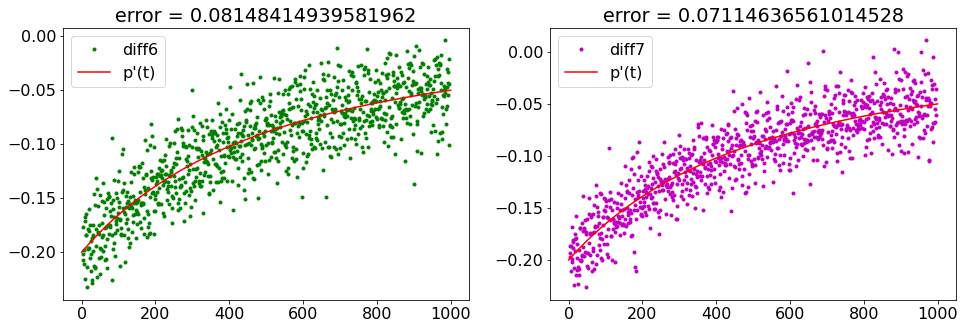

In [9]:
def diffk(t, p, k):
    return (p[k:] - p[:-k]) / (t[k:] - t[:-k])


plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t[3:-3], diffk(t, p, 6), 'g.', label="diff6")
plt.plot(t, pprime, 'r-', label="p'(t)")
plt.title('error = ' + str(np.abs(diffk(t, p, 6) - pprime[3:-3]).max()))
plt.legend(loc='best')
plt.subplot(1, 2, 2)
plt.plot(t[3:-4], diffk(t, p, 7), 'm.', label="diff7")
plt.plot(t, pprime, 'r-', label="p'(t)")
plt.title('error = ' + str(np.abs(diffk(t, p, 7) - pprime[3:-4]).max()))
plt.legend(loc='best')

Text(0.5, 1.0, 'min_error=0.002632831122104884')

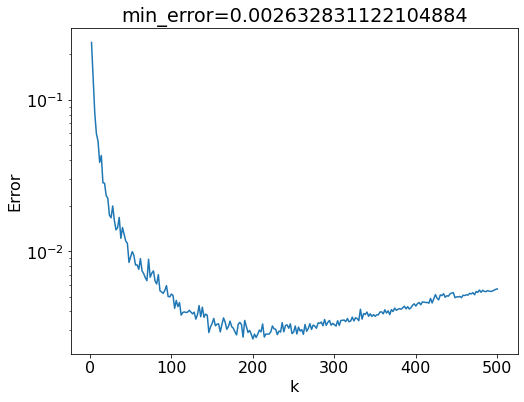

In [10]:
k = np.arange(2, 501, 2)
err = []

for i in k:
    err.append(np.abs(diffk(t, p, i) - pprime[i//2:-i//2]).max())

plt.figure(figsize=(8,6))
plt.plot(k, err)
plt.yscale("log")
plt.ylabel("Error")
plt.xlabel("k")
plt.title("min_error={}".format(np.min(err)))

Видим, что на самом деле оптимальное значение $k$ находится где-то около $200$, расхождение может быть связано с неточностью определения $M_3$. Минимальная ошибка при этом равна 0.0027, почти сходится по с теоретической оценкой

# Сглаживание данных



Несколько другой подход к данной задаче заключается в предварительной очистке данных от шума. Для этого можно попытаться описать данные какой-либо простой зависимостью, а параметры зависимости подогнать по методу наименьших квадратов. Для этого служит функция **np.polyfit**, которая приближает данные многочленом заданной небольшой степени.

In [11]:
# Подогнать данные (t_i, p_i) многочленом пятой степени
# full=True дает доступ к расширенной информации - ошибке приближения
# *_ - отбрасывает все лишние результаты, после первых двух
coeff, [err], *_ =  np.polyfit(t, p, 5, full=True)

Чтобы вычислить полученный многочлен в заданной точке (точках) можно использовать
**np.polyval**

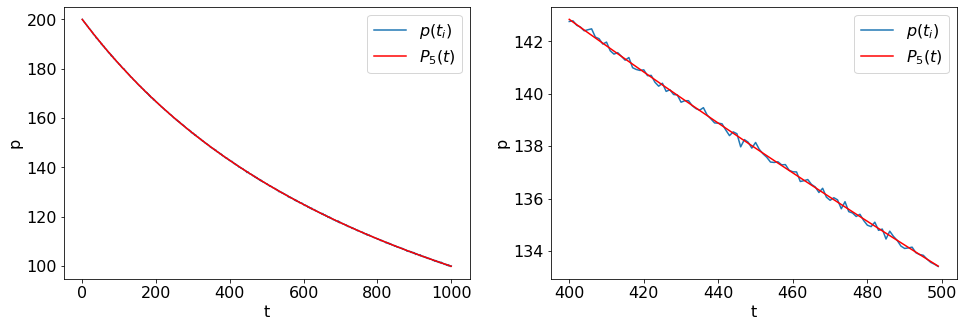

In [12]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t, p, label='$p(t_i)$')
plt.plot(t, np.polyval(coeff, t), 'r-', label='$P_5(t)$')
plt.xlabel('t'); plt.ylabel('p'); plt.legend(loc='best');
plt.subplot(1, 2, 2)
plt.plot(t[400:500], p[400:500], label='$p(t_i)$')
plt.plot(t[400:500], np.polyval(coeff, t[400:500]), 'r-', label='$P_5(t)$')
plt.xlabel('t'); plt.ylabel('p'); plt.legend(loc='best');

Как же определить оптимальный порядок аппроксимирующего многочлена? Слишком маленький порядок не сможет хорошо приблизить данные, а слишком большой будет приближать данные вместе с шумом. В машинном обучении эта проблема назвается компромиссом между сдвигом и дисперсией (bias-variance tradeoff). Переход между данной границей хорошо заметен на графике ошибки в зависимости от степени многочлена. 

Text(0, 0.5, '$\\sum r_i^2$')

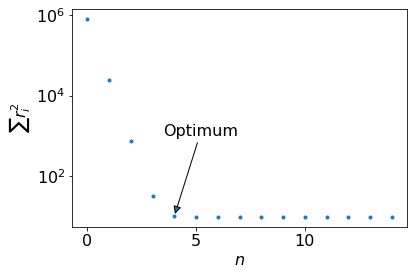

In [13]:
degs = list(range(0, 15))
errs = []
for deg in degs:
    # Сейчас нас интересует только ошибка приближения
    _, [err], *_ =  np.polyfit(t, p, deg, full=True)
    errs.append(err)
    
plt.semilogy(degs, errs, '.')
plt.annotate("Optimum", xy=(degs[4], errs[4]), xytext=(3.5, 1e3), 
             arrowprops={"arrowstyle":"-|>"})
plt.xlabel('$n$')
plt.ylabel('$\sum r_i^2$')

Итак, оптимальная степень многочлена &mdash; 4. В этот раз для вычисления многочлена превратим набор коэффициентов в объект **np.poly1d**.

In [14]:
P4_coeff = np.polyfit(t, p, deg=4) # Получаем с помощью polyfit коэффициенты
P4 = np.poly1d(P4_coeff)           # Превращаем в poly1d
P4der = P4.deriv(m=1)              # poly1d умеет вычислять свои производные

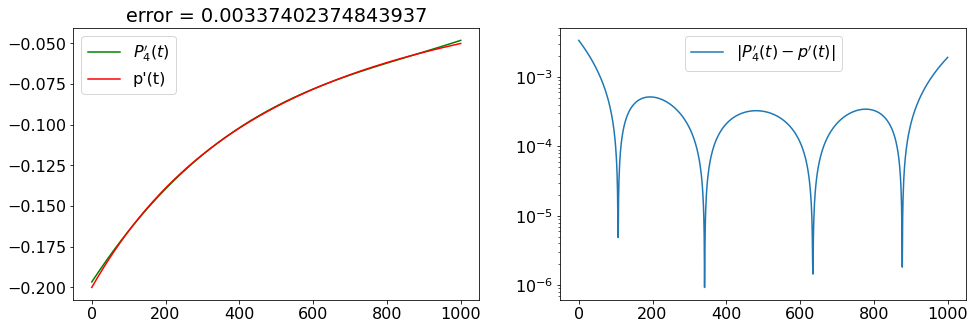

In [15]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t, P4der(t), 'g-', label="$P_4'(t)$")
plt.plot(t, pprime, 'r-', label="p'(t)")
plt.title('error = ' + str(np.abs(P4der(t) - pprime).max()))
plt.legend(loc='best')
plt.subplot(1, 2, 2)
plt.semilogy(t, np.abs(P4der(t) - pprime), label="$|P_4'(t) - p'(t)|$")
plt.legend(loc='best')

# Сглаживание сплайном


Не всегда даже гладкие данные могут быть хорошо описаны многочленом. Особенно плохо приближаются осциллирующие данные. В этом случае приближение многочленом может быть заменено на приближение сплайном.

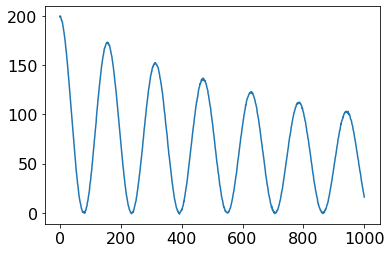

In [16]:
w0 = 0.04
u = p0 / (1 + t/t0) * (0.5 + 0.5 * np.cos(w0 * t)) + 0.5 * np.random.randn(len(t))
uprime = -p0*t0*(1 + np.cos(w0*t) + (t+t0)*w0*np.sin(w0*t))/(2*(t+t0)**2)

plt.plot(t, u)

Попробуем снова приближать многочленами разных степеней. В этом случае характерного излома не наблюдается.

Text(0, 0.5, '$\\sum r_i^2$')

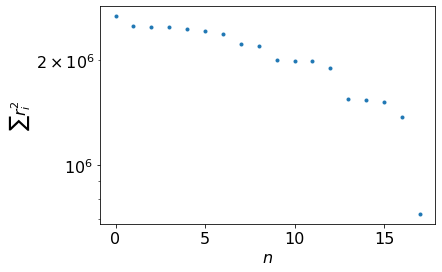

In [17]:
degs = list(range(0, 18))
errs = []
for deg in degs:
    _, [err], *_ =  np.polyfit(t, u, deg, full=True)
    errs.append(err)
    
plt.semilogy(degs, errs, '.')
plt.xlabel('$n$')
plt.ylabel('$\sum r_i^2$')

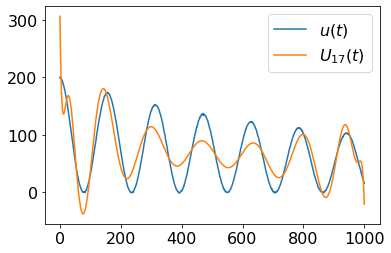

In [18]:
U17 = np.poly1d(np.polyfit(t, u, deg=17))
plt.plot(t, u, label='$u(t)$')
plt.plot(t, U17(t), label='$U_{17}(t)$')
plt.legend(loc='best')

Многочлен приближает данные отвратительно. Приблизим данные сплайном. Для этого воспользуемся возможностями библиотеки **scipy**

In [19]:
from scipy.interpolate import UnivariateSpline, InterpolatedUnivariateSpline

In [20]:
Uint = InterpolatedUnivariateSpline(t, u, k=3)

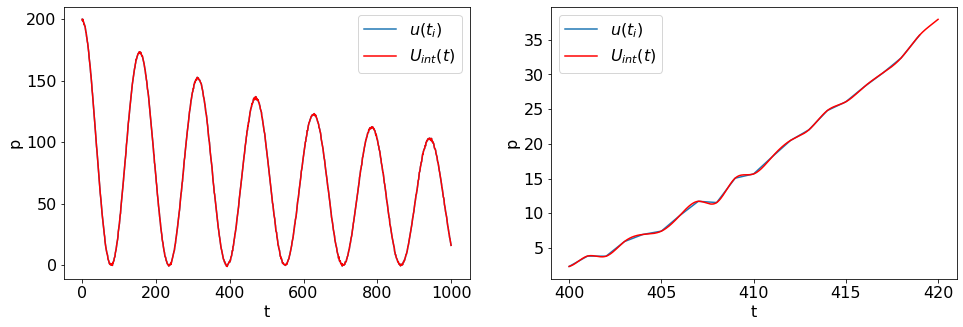

In [21]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t, u, label='$u(t_i)$')
plt.plot(t, Uint(t), 'r-', label='$U_{int}(t)$')
plt.xlabel('t'); plt.ylabel('p'); plt.legend(loc='best');
plt.subplot(1, 2, 2)
plt.plot(t[400:420], u[400:420], label='$u(t_i)$')

tt = np.linspace(t[400], t[420], 500) # Для отрисовки сплайна нужно больше точек

plt.plot(tt, Uint(tt), 'r-', label='$U_{int}(t)$')
plt.xlabel('t'); plt.ylabel('p'); plt.legend(loc='best');

Text(0.5, 1.0, 'error = 4.69463811439515')

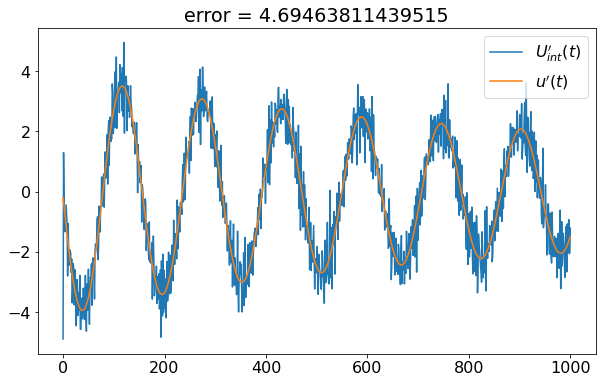

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(t, Uint.derivative()(t), label="$U_{int}'(t)$")
plt.plot(t, uprime, label="$u'(t)$")
plt.legend(loc='best')
plt.title('error = ' + str(np.abs(uprime - Uint.derivative()(t)).max()))

Интерполирующий сплайн повторяет все отклонения исходной функции из-за шума, но сам является гладкой функцией. Для того чтобы действительно сгладить данные, нужно использовать **UnivariateSpline**

In [23]:
# Параметр s отвечает за сглаживание
Usmooth = UnivariateSpline(t, u, s=100)

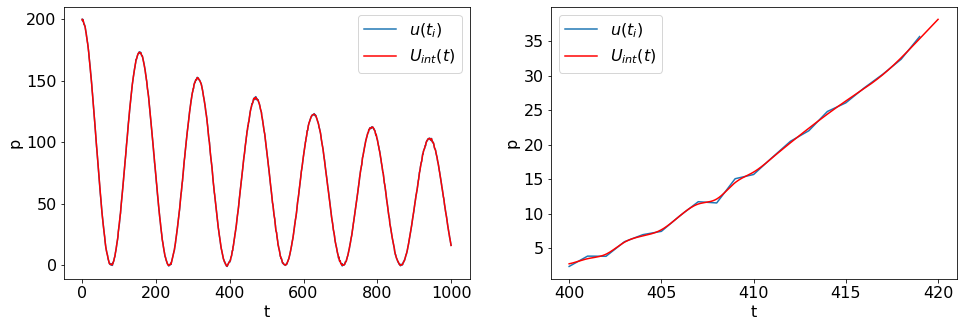

In [24]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t, u, label='$u(t_i)$')
plt.plot(t, Usmooth(t), 'r-', label='$U_{int}(t)$')
plt.xlabel('t'); plt.ylabel('p'); plt.legend(loc='best');
plt.subplot(1, 2, 2)
plt.plot(t[400:420], u[400:420], label='$u(t_i)$')

tt = np.linspace(t[400], t[420], 500) # Для отрисовки сплайна нужно больше точек

plt.plot(tt, Usmooth(tt), 'r-', label='$U_{int}(t)$')
plt.xlabel('t'); plt.ylabel('p'); plt.legend(loc='best');

Text(0.5, 1.0, 'error = 2.942496332751392')

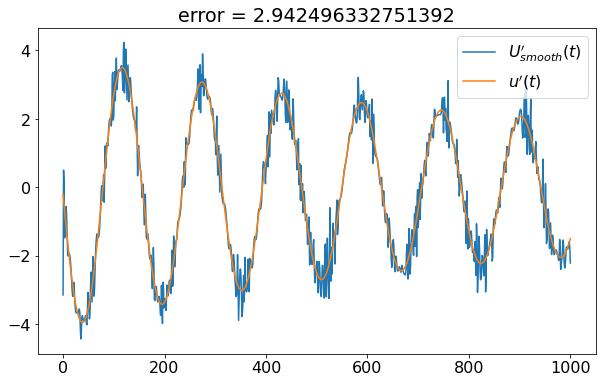

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(t, Usmooth.derivative()(t), label="$U_{smooth}'(t)$")
plt.plot(t, uprime, label="$u'(t)$")
plt.legend(loc='best')
plt.title('error = ' + str(np.abs(uprime - Usmooth.derivative()(t)).max()))

## Задание 2. 



Прочитать документацию к [UnivariateSpline](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html) и определить оптимальное значение для параметра сглаживания **s**, учитывая, что шум был задан в виде $u_i = \dots + 0.5 \xi_i, \quad \xi_i \sim \mathcal N(0, 1)$. Экспериментально проверить оптимальность этого значения.

__Решение__

В качестве количества узлов предлагается использовать $s: \sum_{i=1}^n\left(\omega_i (y_i - spl(x_i))\right)^2 \leq s$

Так как дисперсия ошибки равна $\sigma ^2 = 0.25$, то $\sum_{i=1}^n\left(y_i - spl(x_i)\right)^2 \geq n \sigma ^2$(по сути выборочная дисперсия), т.е. $s^* = \frac{n}{4}$. 

Text(0.5, 1.0, 'error = 0.11405785856448314')

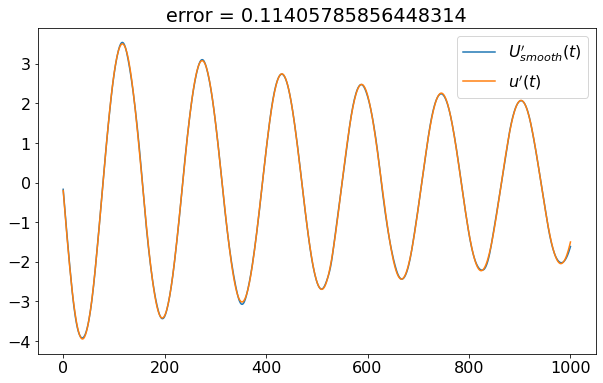

In [26]:
Usmooth = UnivariateSpline(t, u, s=len(t)//4)

plt.figure(figsize=(10, 6))
plt.plot(t, Usmooth.derivative()(t), label="$U_{smooth}'(t)$")
plt.plot(t, uprime, label="$u'(t)$")
plt.legend(loc='best')
plt.title('error = ' + str(np.abs(uprime - Usmooth.derivative()(t)).max()))

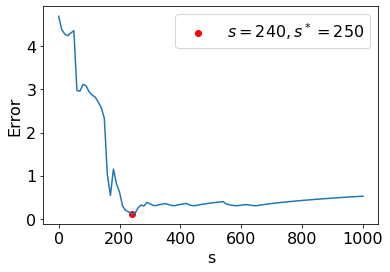

In [31]:
s = np.arange(0, 1001, 10)
err = []
for i in s:
    Usmooth = UnivariateSpline(t, u, s=i)
    err.append(np.abs(uprime - Usmooth.derivative()(t)).max())
plt.plot(s, err)
plt.xlabel("s")
plt.ylabel("Error")

idx = np.argmin(err)

plt.scatter(s[idx], err[idx], color="red", label="$s={}, s^*={}$".format(s[idx], 250))
plt.legend()

__Вывод:__

- теоретическая оценка оптимального $s$ хорошо сходится с оптимальным значением

- ошибка при теоретическом оптимуме $s=250$ и оптимальная ошибка при $s=260$ равны $0.193$ и $0.172$ соответственно

# Задание 3.

При дифференцировании функций имеются два основных источника погрешности

- Ошибка метода - уменьшается при уменьшении $\boldsymbol{h}$

- Ошибка вычислений - растет при уменьшении $\boldsymbol{h}$


Поскольку характер роста ошибок различный, существует некоторое значение $h^{*}$, при котором ошибка минимальна. Рассмотрите полную ошибку
$\varepsilon_{\text {total }}=\varepsilon_{\text {method }}+\varepsilon_{\text {comp }}$
как функцию от $h$ для формулы центральной разности и найдите минимум. 

$$
f^{\prime}\left(x_{0}\right) \approx \frac{1}{12 h}\left(f_{i-2}-8 f_{i-1}+8 f_{i+1}-f_{i+2}\right)
$$


Максимум модуля пятой  производной в окрестности $x_{0}$ оценивайте как $M_{5}$, ошибку вычисления $f$ как $\Delta f$.

__Решение__

$\varepsilon_{comp} = \frac{18\Delta f}{12h} = \frac{3\Delta f}{2h}$

Первые производные сократятся с $f'(x_0)$, вторые и четвёртые в силу чётности, третьи в силу $2^3 = 8$, останутся пятые производные. Тогда $\left| f'(x_0) - \hat{f'}(x_0) \right| = \frac{7M_5 }{90}h^4 + O(h^7)$

$\varepsilon_{method} = \frac{7M_5 }{90}h^4$


$h^* = \sqrt[5]{\frac{135\Delta f}{28M_5}}$

$\varepsilon^* =  \frac{3\Delta f}{2h^*} + \frac{7M_5 }{90}{h^{*}}^{4}$



# Задание 4.

Используя сглаженные данные из задания 2, постройте график производной с помощью формулы из задания 3. Сравнить фактическую ошибку вычисления производной с теоретической оценкой из задания 3. Также сравнить, используя для вычисления производной не соседние точки, а точки на расстоянии, определённом из задания 1.

In [320]:
def diff3(t, p, k):
    return t[2*k:-2*k], ((np.roll(p, 2*k) - np.roll(p, -2*k) + 8*(np.roll(p, -k) - np.roll(p, k))) / (6*(np.roll(t, -k) - np.roll(t, k))))[2*k:-2*k]

Text(0.5, 1.0, 'error = 1.1876655766968152')

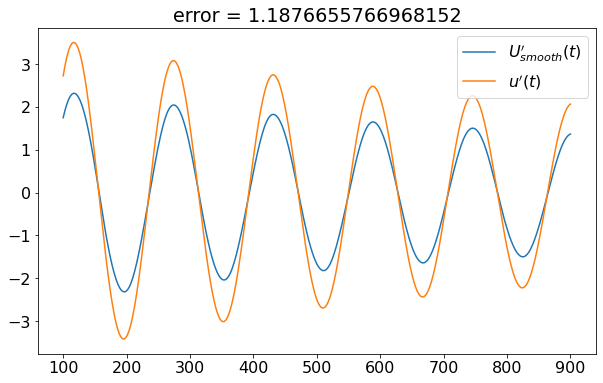

In [321]:


Usmooth = UnivariateSpline(t, u, s=260)

k = 50
tt, dU = diff3(t, Usmooth(t), k)
plt.figure(figsize=(10, 6))
plt.plot(tt, dU, label="$U_{smooth}'(t)$")
plt.plot(tt, uprime[2*k:-2*k], label="$u'(t)$")
plt.legend(loc='best')
plt.title('error = ' + str(np.abs(uprime[2*k:-2*k] - dU).max()))

# Основы теории погрешностей.


Любая вычисляемая или измеряемая величина определяется с погрешностью. Это значит, что приближённое значение величины, вычисляемое на компьютере, отличается от истинного.

Погрешности бывают абсолютные и относительные. Абсолютная погрешность - это максимальное отклонение от истинного значения, взятое по модулю. Относительная погрешность - вычисленное в процентах.

Погрешности прежде всего разделяют на устранимые и неустранимые. Неустранимыми называют погрешности, вызванные неопределённостью входных данных. Устранимые погрешности бывают двух видов: погрешности округлений при вычислениях на компьютере и погрешности вычислительных методов.

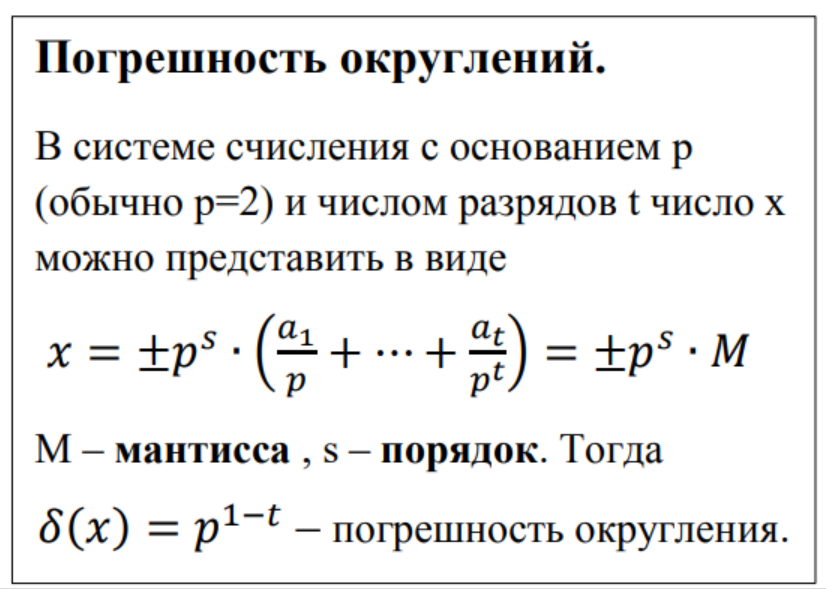


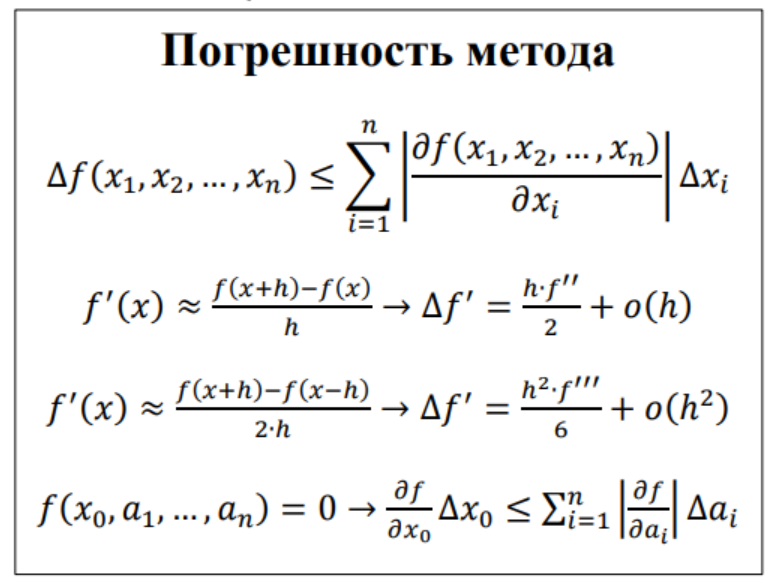

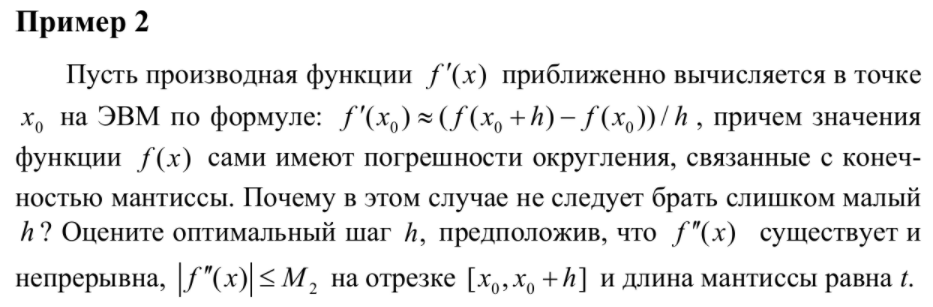

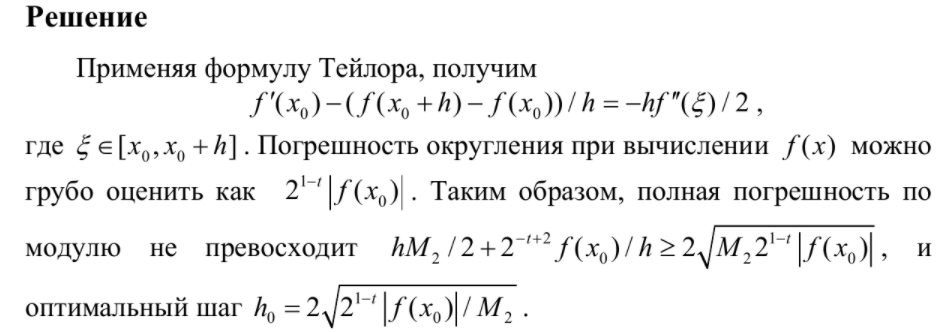

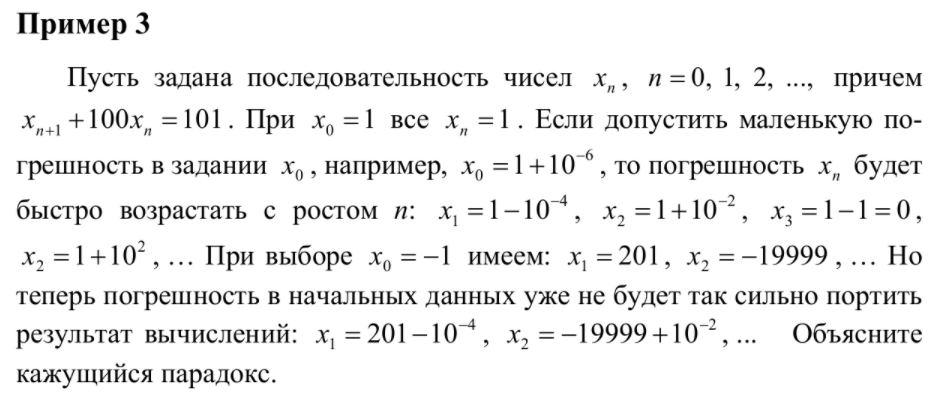

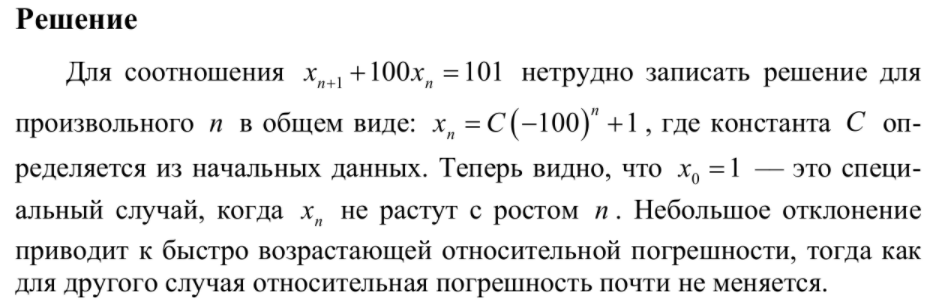

# Задание 5.

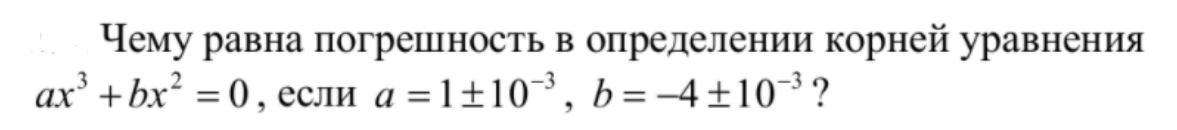

Погрешность метода пристального вглядывания для $x_{1,2}=0$ отсутствует, это особый случай. Для $x_3=-\frac{b}{a}$ погрешность считается как $\varepsilon_{method} = \frac{b}{a}\sqrt{\left(\frac{\Delta a}{a}\right)^2+\left(\frac{\Delta b}{b}\right)^2}=4\sqrt{17/16
\cdot 10^{-6}}\simeq 4\cdot 10^{-3}, \varepsilon_{comp} = 0.01\cdot 10^{-3}$ - погрешность округления

$\varepsilon = 4\cdot 10^{-3}$

# Задание 6. 

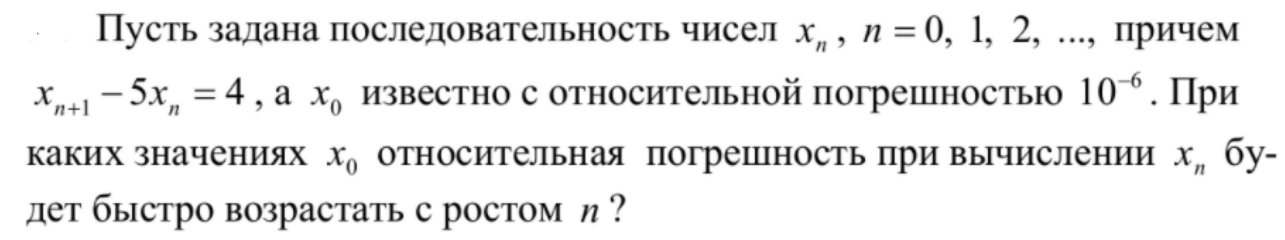

$x_n = (x_0+1) 5^n - 1$

$x_0=-1 \Rightarrow x_n=x_0=-1$ 

Погрешность при вычислениях растёт как $10^{-6} \rightarrow 5\cdot 10^{-6} \rightarrow[n] \rightarrow 5^{n}\cdot 10^{-6}$, т.е. в случае с $x_0$ относительная погрешность растёт как $5^n$, при других $x_0$ относительная погрешность не меняется